# Selenium 版本

In [ ]:
import os
from time import sleep
from selenium import webdriver
from selenium.webdriver.common.by import By

In [2]:
# 新增資料夾
folderName = 'nidss'
folderPath = f'./{folderName}'
if not os.path.exists(folderPath):
    os.makedirs(folderPath)

# 設定下載檔案的路徑 (覆寫 Chrome 預設下載路徑)
fullDownloadPath = os.getcwd() + '\\' + folderName

# Chrome 設定
my_options = webdriver.ChromeOptions()
my_options.add_argument("--start-maximized")
my_options.add_experimental_option("prefs", {
    "download.default_directory": fullDownloadPath,
    "download.prompt_for_download": False,
    "download.directory_upgrade": True,
    "safebrowsing_for_trusted_sources_enabled": False,
    "safebrowsing.enabled": False,
    "plugins.always_open_pdf_externally": True
})

# 開啟自動化工具(瀏覽器)
driver = webdriver.Chrome(options = my_options)

In [3]:
# 全國 嚴重特殊傳染性肺炎(112/3/19以前病例定義版本)
driver.get("https://nidss.cdc.gov.tw/nndss/disease?id=19CoV")

In [4]:
# 點選下載圖示
driver.find_element(By.CSS_SELECTOR, "g.highcharts-exporting-group").click()

# 等待 2 秒
sleep(2)

# 按下 Download CSV，會自動下載到覆寫後的 Chrome 下載路徑
driver.find_elements(By.CSS_SELECTOR, "li.highcharts-menu-item")[6].click()

In [5]:
# 關閉瀏覽器
driver.quit()

# Requests 版本

In [2]:
import requests as req
import os, json, re
import matplotlib.pyplot as plt

In [3]:
# 新增資料夾
folderPath = f'./nidss'
if not os.path.exists(folderPath):
    os.makedirs(folderPath)

381
381


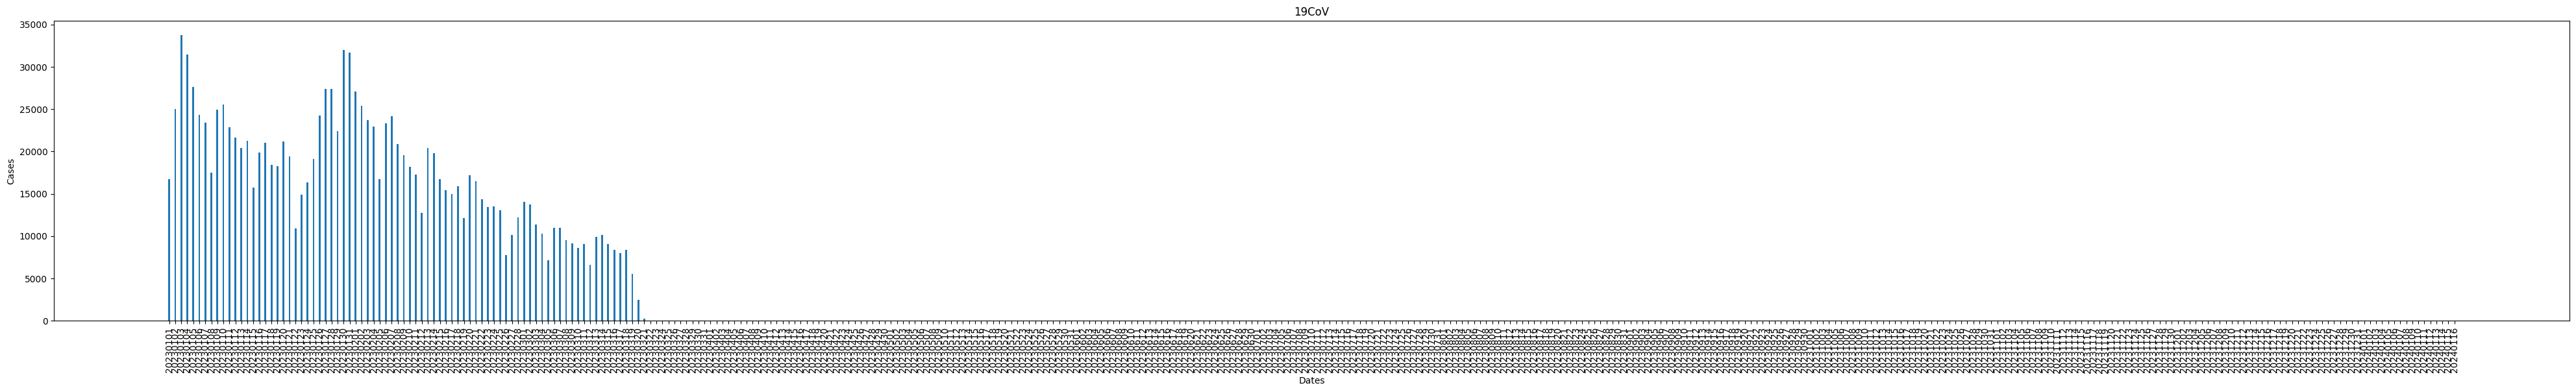

In [4]:
# 發出請求，取得 html
url = "https://nidss.cdc.gov.tw/nndss/disease?id=19CoV"
res = req.get(url=url)

# 放置 json 字串的變數
str_json = ""

# 過濾出來需要的資料
regex = r"hcJson\.push\((.+)\)"
match = re.search(regex, res.text)
if match != None:
    str_json = match[1]

# 儲存 json
with open(f"{folderPath}/nidss.json", "w", encoding="utf-8") as file:
    file.write(str_json)

# 將 json 轉成變數
dict_json = json.loads(str_json)

# 取得日期 (可以作為標題)
list_dates = dict_json['xAxis_categories']

# 取得確診數量 (對應 日期)
list_cases = dict_json['series'][0]['data']

# 確認資料數量是否一置
print(len(list_dates))
print(len(list_cases))

# 建立圖表
plt.figure(figsize=(50, 6)) # 寬度 50 inches 和 高度 6 inches 
plt.bar(list_dates, list_cases, 0.3)
plt.title("19CoV")
plt.xlabel("Dates")
plt.ylabel("Cases")
plt.xticks(rotation=90)
plt.show()